In [1]:
import pandas as pd
import numpy
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Cleaning Data and preparing it for use.

data = []
with open('final.csv.xls',encoding='utf-8') as csv_file:
    for row in csv_file:
        row = row[1:]
        number = ''
        title = ''
        tag = ''
        if '""' in row:
            try:
                index1 = row.index('""')
                index2 = row.index('",')
                number = row[:index1-1]
                title = row[index1+2:index2-1]
                tag = row[index2+2:]

                title = title.replace(',','')

                row = number +','+ title +','+ tag
                row = row.split(',')
            except:
                continue
                
        else:
            row = row.split(',')
            

        row[2] = row[2].replace('"\n','')
        data.append(row)

In [4]:
# Making a dataframe

data1 = data.copy()
column_names = data1.pop(0)
df = pd.DataFrame(data1,columns=['Number','Title','Tag'])
df = df.drop(columns = ['Number'])

In [5]:
# getting tag/label counts
df.Tag.value_counts()

[none]      2385
the         1381
nba          450
buzzfeed     368
latest       322
            ... 
biology        1
tholi          1
doria          1
western        1
yakiniku       1
Name: Tag, Length: 5208, dtype: int64

In [6]:
import re
import string


# funtion for removing punctionation
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct
df['Clean_Title'] = df['Title'].apply(lambda x: remove_punct(x))

In [7]:
# tokenizing the titles of the dataset and placing them in lists

from nltk import word_tokenize
nltk.download('punkt')

tokens = [word_tokenize(sen) for sen in df.Clean_Title]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Making all the Titles in Lower case 

def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [9]:
# removing stop words

from nltk.corpus import stopwords
nltk.download('stopwords')
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]

df['Final_Title'] = [' '.join(sen) for sen in filtered_words]
df['tokens'] = filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df

,Title,Tag,Clean_Title,Final_Title,tokens
0,eminem - walk on water (audio) ft. beyoncé,eminem,eminem walk on water audio ft beyoncé,eminem walk water audio ft beyoncé,"[eminem, walk, water, audio, ft, beyoncé]"
1,plush - bad unboxing fan mail,plush,plush bad unboxing fan mail,plush bad unboxing fan mail,"[plush, bad, unboxing, fan, mail]"
2,racist superman | rudy mancuso king bach & lel...,racist,racist superman rudy mancuso king bach lele ...,racist superman rudy mancuso king bach lele pons,"[racist, superman, rudy, mancuso, king, bach, ..."
3,i dare you: going bald!?,ryan,i dare you going bald,dare going bald,"[dare, going, bald]"
4,ed sheeran - perfect (official music video),edsheeran,ed sheeran perfect official music video,ed sheeran perfect official music video,"[ed, sheeran, perfect, official, music, video]"
...,...,...,...,...,...
40869,how2: how to solve a mystery,annoying,how2 how to solve a mystery,how2 solve mystery,"[how2, solve, mystery]"
40870,eli lik lik episode 13 partie 01,hkayet,eli lik lik episode 13 partie 01,eli lik lik episode 13 partie 01,"[eli, lik, lik, episode, 13, partie, 01]"
40871,kingdom hearts iii – square enix e3 showcase 2...,kingdom,kingdom hearts iii – square enix e3 showcase 2...,kingdom hearts iii – square enix e3 showcase 2...,"[kingdom, hearts, iii, –, square, enix, e3, sh..."
40872,trump advisor grovels to trudeau,180612__tb02sorryexcuse,trump advisor grovels to trudeau,trump advisor grovels trudeau,"[trump, advisor, grovels, trudeau]"


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Creating onehot encoding with the labels
def onehot(df):
    values = array(df)

    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return label_encoder, onehot_encoded

In [13]:
# Data split 90% to 10%

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.10, random_state=42)

In [14]:
train_label_encoder, train_onehot = onehot(data_train['Tag'])

In [15]:
# Creating a vocabulary of words of training dataset
# Getting the Maximum Length of the titles i.e 27

all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

266205 words total, with a vocabulary size of 30876
Max sentence length is 27


In [16]:
# Creating a vocabulary of words of testing dataset
# Getting the Maximum Length of the titles i.e 26

all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

29782 words total, with a vocabulary size of 10079
Max sentence length is 26


In [17]:
MAX_SEQUENCE_LENGTH =  max(training_sentence_lengths)
EMBEDDING_DIM = 300

In [18]:
data_train

,Title,Tag,Clean_Title,Final_Title,tokens
14453,taarak mehta ka ooltah chashmah - ep 2388 - fu...,sab,taarak mehta ka ooltah chashmah ep 2388 full...,taarak mehta ka ooltah chashmah ep 2388 full e...,"[taarak, mehta, ka, ooltah, chashmah, ep, 2388..."
8021,rwby volume 5: chapter 10 - true colors | roos...,rooster,rwby volume 5 chapter 10 true colors rooster...,rwby volume 5 chapter 10 true colors rooster t...,"[rwby, volume, 5, chapter, 10, true, colors, r..."
11321,the view january 8 2018 - ana navarro; lindsey...,[none],the view january 8 2018 ana navarro lindsey g...,view january 8 2018 ana navarro lindsey graham...,"[view, january, 8, 2018, ana, navarro, lindsey..."
25077,the voice behind 250 of your favorite cartoons,great,the voice behind 250 of your favorite cartoons,voice behind 250 favorite cartoons,"[voice, behind, 250, favorite, cartoons]"
1113,sudbury santa claus parade 2017,live,sudbury santa claus parade 2017,sudbury santa claus parade 2017,"[sudbury, santa, claus, parade, 2017]"
...,...,...,...,...,...
6265,the sacred riana spooked jay park - results sh...,asia's,the sacred riana spooked jay park results sho...,sacred riana spooked jay park results show asi...,"[sacred, riana, spooked, jay, park, results, s..."
11284,strange things happening in ecuador..,mystery,strange things happening in ecuador,strange things happening ecuador,"[strange, things, happening, ecuador]"
38158,hayley kiyoko - what i need (feat. kehlani) [o...,kehlani,hayley kiyoko what i need feat kehlani offici...,hayley kiyoko need feat kehlani official video,"[hayley, kiyoko, need, feat, kehlani, official..."
860,《猎场》22、23、24、25集最全预告集合：郑秋冬误会罗伊人有新恋情，第一次猎头成功，闽京...,热播剧、剧透、预告、胡歌、陈龙、孙红雷、张嘉译、祖峰、胡兵、菅纫姿、万茜、郑秋冬、刘量体、林...,《猎场》22、23、24、25集最全预告集合：郑秋冬误会罗伊人有新恋情，第一次猎头成功，闽京...,《猎场》22、23、24、25集最全预告集合：郑秋冬误会罗伊人有新恋情，第一次猎头成功，闽京...,[《猎场》22、23、24、25集最全预告集合：郑秋冬误会罗伊人有新恋情，第一次猎头成功，闽...


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Tokenizing and then padding the titles in the training dataset

tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train['Final_Title'].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train['Final_Title'].tolist())
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
train_cnn_data = pad_sequences(training_sequences, 
                               maxlen=MAX_SEQUENCE_LENGTH)

Using TensorFlow backend.


Found 30866 unique tokens.


In [20]:
from gensim import models

# download GoogleNews-vectors-negative300.bin from this github link https://github.com/mmihaltz/word2vec-GoogleNews-vectors
# After downloading it place it in the working file.

word2vec_path = 'GoogleNews-vectors-negative300.bin'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [21]:
import numpy as np

train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))

for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)

print(train_embedding_weights.shape)

(30867, 300)


In [24]:
# The CNN
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
#     Embedding Layer
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embeddings],
                               input_length = max_sequence_length,
                               trainable = False)
    
#     Specifying the sequence input
    sequence_input = Input(shape = (max_sequence_length,), dtype='int32')
    
    embedded_sequences = embedding_layer(sequence_input)
    
    convs = []
#     filter sizes - you can change these but I have observed that an incease pattern improves the results
    filter_sizes = [2,3,4,5,6,7]

    #     CNN has 7 blocks


    for filter_size in filter_sizes: # 6 blocks in loop - Each Block has - 1 D Convolution Layer and Global Max Pooling Layer
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
  
    
    l_merge = concatenate(convs, axis=1)
    
#     Last block has a dropout layer of 0.1, a Dense Layer
    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    preds = Dense(labels_index, activation='softmax')(x)
    
    model = Model(sequence_input, preds)
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
    
    model.summary()
    
    return model


In [25]:
# compiling the model
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 5015)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 27)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 27, 300)      9260100     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 26, 200)      120200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 25, 200)      180200      embedding_1[0][0]                
____________________________________________________________________________________________

In [26]:
# set number of epochs and batch sizes
num_epochs = 50
batch_size = 30

In [27]:
y_tr = train_onehot
x_train = train_cnn_data

In [ ]:
# Fit the model
# training for the first time and saving the weights as model.h5
# The model will stop training if the loss is not dropping. Incease the patience or remove the earlyStopping from the callbacks -
# from the model.fit() function

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

checkpoint = ModelCheckpoint("model1.h5", monitor='loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(x_train, y_tr, verbose=2, epochs=num_epochs, batch_size=batch_size, callbacks=[checkpoint], validation_split=0.1, shuffle=True)

In [28]:
'''
to load model weights "model.h5" and train it again for more epochs
I have provided the model.h5 file so you can reload the weights
The model will stop training if the loss is not dropping. Incease the patience or remove the earlyStopping from the callbacks -
from the model.fit() function
'''

model = load_model("model.h5")
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
checkpoint = ModelCheckpoint("model.h5", monitor='loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# history = model.fit(x_train, y_tr, verbose=2, epochs=num_epochs, batch_size=batch_size, callbacks=[earlyStopping, checkpoint], validation_split=0.1, shuffle=True)

In [29]:
# Tokenize the test data and pad it
test_sequences = tokenizer.texts_to_sequences(data_test['Final_Title'].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [31]:
# Make predictions

predictions = model.predict(test_cnn_data, verbose=2)  

In [32]:
# making the onehot encoding of the test dataset
test_label_encoder, test_onehot = onehot(data_test['Tag'])

In [33]:
# getting accuracy

correct = 0
for i in range(len(test_onehot)):
    original = test_label_encoder.inverse_transform([argmax(test_onehot[i, :])])
    predicted = train_label_encoder.inverse_transform([argmax(predictions[i, :])])
    
    if original[0] == predicted[0]:
        correct = correct + 1
        
print(correct/len(test_onehot)*100)

72.57827788649706


In [34]:
# check the outputs 
inverted = test_label_encoder.inverse_transform([argmax(test_onehot[6, :])]) 
print(inverted)
inverted = train_label_encoder.inverse_transform([argmax(predictions[6, :])])
print(inverted)

['fall']
['fall']


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


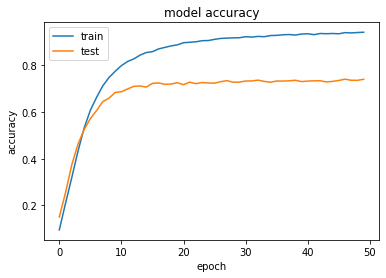

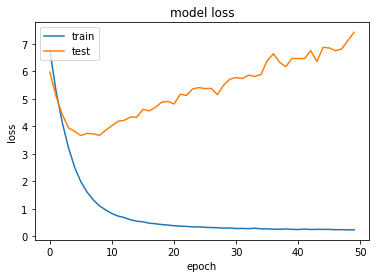

In [106]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()